In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import spacy

import re
from bs4 import BeautifulSoup

#### Loading german lang medium model in spacy

In [2]:
nlp = spacy.load('de_core_news_md') 

In [3]:
df = pd.read_excel("C:\\AA-Classes\\Z\\data.xlsx")

In [4]:
df.head()

,id,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification
0,15,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE
1,20,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE
2,24,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE
3,45,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE
4,49,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH


In [5]:
df.Text[0]

'Ich habe meinen Vater bis zu seinem Tode gepflegt und ihn bis zum letzten Moment begleitet. Dank der Unterstützung meiner Frau konnte ich mir die nötige Zeit nehmen, mir entsprechende (technische) Fähigkeiten aneignen und eben auch für ihn da sein. Das Ergebnis war - trotz langer und schwerer Krankheit - eine "weiche Landung" für ihn. Gelernt habe ich, dass Loyalität bis in den Tod - auch wenn das in unserer hedonistischen und bigotten Zeit verfemt ist - das größte Kompliment ist, dass man machen kann und die entsprechende Dankbarkeit (die Teil der Leistung ist, mit der man sich solche Loyalität VERDIENT) der größte Lohn ist, den man bekommen kann.\xa0'

#### Removing Irrelevant data

In [6]:
df = df.drop('id',axis = 1)

In [7]:
df.head()

,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH


#### Check for Null values

In [8]:
df.isnull().sum()

Geschlecht                                  0
Alter                                       0
Text                                        0
Extraversion_Classification                 0
Gewissenhaftigkeit_Classification           0
EmotionaleStabilitaet_Classification        0
Offenheit_Classification                    0
Empathie_Classification                     0
Wirksamkeitsueberzeugung_Classification     0
Optimismus_Classification                   0
Resilienz_Classification                    0
UnternehmerischesKapital_Classification     0
AgilityMindset_Classification               0
Machiavellismus_Classification              0
Narzissmus_Classification                   0
Psychopathie_Classification                 0
ZerstoererischesPotential_Classification    0
dtype: int64

#### Feature engineering

In [9]:
 df = df.rename(columns={'Alter':'Jahr'})

In [10]:
from datetime import date

current_year = date.today().year
df['Alter'] = current_year - df['Jahr']

In [11]:
df.head()

,Geschlecht,Jahr,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alter
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47


#### Data preparation

In [12]:
def data_prep(x):
    x = [stopwords for stopwords in nlp(x) if not stopwords.is_stop]     # removes stopwords
    x = str(x).lower().replace('\\','').replace('_',' ')
    x = re.sub(r'[^\w ]+', "", x)                                        # removes special characters
    x = BeautifulSoup(x, 'lxml').get_text().strip()                      # removes html tags
    return x

In [13]:
data_prep("Ich habe meinen Vater bis zu seinem Tode gepflegt und ihn bis zum letzten Moment begleitet ")

'vater tode gepflegt letzten moment begleitet'

In [14]:
df['Text'] = df['Text'].apply(lambda x:data_prep(x))

In [15]:
df.Text[0]

'vater tode gepflegt letzten moment begleitet  unterstützung frau nötige nehmen  entsprechende  technische  fähigkeiten aneignen  ergebnis  trotz langer schwerer krankheit   weiche landung   gelernt  loyalität tod  hedonistischen bigotten verfemt  größte kompliment  entsprechende dankbarkeit  leistung  loyalität verdient  größte lohn  bekommen'

#### Lemmatization

In [16]:
df['lemmatized'] = df['Text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [17]:
df.head()

,Geschlecht,Jahr,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alter,lemmatized
0,M,1972,vater tode gepflegt letzten moment begleitet ...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50,Vater Tod pflegen letzter Moment begleiten U...
1,F,1976,aufnahmeprüfung landesgymnasium musik bestande...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46,Aufnahmeprüfung Landesgymnasium Musik bestehen...
2,F,1966,sohn kindertagen adhs diagnostiziert mühe anst...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56,Sohn kindertag Adhs diagnostizieren mühe Anstr...
3,F,1966,größter erfolg trotz erkrankung erstaunlich ...,AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56,groß Erfolg trotz Erkrankung erstaunlich i...
4,M,1975,siebeneinhalb wohnungen gekauft bewohne selbe...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47,siebeneinhalb Wohnung kaufen bewohnen selber...


In [18]:
df.lemmatized[0] 

'Vater Tod pflegen letzter Moment begleiten   Unterstützung Frau nötig nehmen   entsprechend   technisch   Fähigkeit aneignen   Ergebnis   trotz lang schwer Krankheit    weich Landung    lernen   Loyalität Tod   hedonistisch bigotten verfemen   groß Kompliment   entsprechend Dankbarkeit   Leistung   Loyalität verdienen   groß Lohn   bekommen'

#### Encoding the target field

In [46]:
df['EmotionaleStabilitaet_Classification'] = df['EmotionaleStabilitaet_Classification'].replace(['LOW','AVERAGE','HIGH'],[0,1,2])

In [47]:
df.head()

,Geschlecht,Jahr,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alter,lemmatized
0,M,1972,vater tode gepflegt letzten moment begleitet ...,HIGH,AVERAGE,1,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,AVERAGE,AVERAGE,50,Vater Tod pflegen letzter Moment begleiten U...
1,F,1976,aufnahmeprüfung landesgymnasium musik bestande...,AVERAGE,HIGH,1,AVERAGE,AVERAGE,AVERAGE,HIGH,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46,Aufnahmeprüfung Landesgymnasium Musik bestehen...
2,F,1966,sohn kindertagen adhs diagnostiziert mühe anst...,HIGH,AVERAGE,1,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,AVERAGE,AVERAGE,AVERAGE,56,Sohn kindertag Adhs diagnostizieren mühe Anstr...
3,F,1966,größter erfolg trotz erkrankung erstaunlich ...,AVERAGE,HIGH,2,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,HIGH,HIGH,HIGH,AVERAGE,AVERAGE,AVERAGE,56,groß Erfolg trotz Erkrankung erstaunlich i...
4,M,1975,siebeneinhalb wohnungen gekauft bewohne selbe...,AVERAGE,HIGH,2,AVERAGE,HIGH,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,47,siebeneinhalb Wohnung kaufen bewohnen selber...


#### Train & Test Split

In [48]:
X = df[['Text']]
y= df['EmotionaleStabilitaet_Classification']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### BERT Model

In [50]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [51]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_de_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_de_uncased_L-12_H-768_A-12/4")

In [52]:
def sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [53]:
sentence_embeding(["Ich habe meinen Vater bis zu seinem Tode gepflegt",
                       "ihn bis zum letzten Moment begleitet"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7814501 , -0.31337577,  0.00211338, ...,  0.08261453,
        -0.6618706 ,  0.7963221 ],
       [-0.86962104, -0.46866342, -0.7413928 , ..., -0.39593118,
        -0.7076323 ,  0.80884373]], dtype=float32)>

#### Comparing the fields using Cosine Similarity

In [54]:
cs = sentence_embeding(["Extraversion",
                           "Gewissenhaftigkeit",
                           "EmotionaleStabilitaet",
                           "Offenheit",
                           "Empathie",
                           "Wirksamkeitsueberzeugung",
                           "Optimismus",
                           "Resilienz",
                           "UnternehmerischesKapital",
                           "AgilityMindset",
                           "Machiavellismus",
                           "Narzissmus",
                           "Psychopathie",
                           "ZerstoererischesPotential"])

In [55]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([cs[0]],[cs[1]])

array([[0.93058527]], dtype=float32)

In [56]:
cosine_similarity([cs[5]],[cs[7]])

array([[0.95692396]], dtype=float32)

#### Functional model in Tensorflow

In [57]:
## BERT layer
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [58]:
# NN layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [59]:
## constructing final model 
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [60]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [61]:
len(X_train)

1485

In [62]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [63]:
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
47/47 [==============================] - 251s 5s/step - loss: -3.3987 - accuracy: 0.6593 - precision: 1.0000 - recall: 1.0000
Epoch 2/8
47/47 [==============================] - 285s 6s/step - loss: -9.3484 - accuracy: 0.6593 - precision: 1.0000 - recall: 1.0000
Epoch 3/8
47/47 [==============================] - 325s 7s/step - loss: -15.4042 - accuracy: 0.6593 - precision: 1.0000 - recall: 1.0000
Epoch 4/8
47/47 [==============================] - 232s 5s/step - loss: -21.5229 - accuracy: 0.6593 - precision: 1.0000 - recall: 1.0000
Epoch 5/8
47/47 [==============================] - 362s 8s/step - loss: -27.6462 - accuracy: 0.6593 - precision: 1.0000 - recall: 1.0000
Epoch 6/8
47/47 [==============================] - 446s 9s/step - loss: -33.7753 - accuracy: 0.6593 - precision: 1.0000 - recall: 1.0000
Epoch 7/8
47/47 [==============================] - 385s 8s/step - loss: -39.8710 - accuracy: 0.6593 - precision: 1.0000 - recall: 1.0000
Epoch 8/8
47/47 [==========================

In [64]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 78s 5s/step - loss: -49.5214 - accuracy: 0.6525 - precision: 1.0000 - recall: 1.0000


[-49.52140426635742, 0.6525252461433411, 1.0, 1.0]

In [65]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

16/16 [==============================] - 77s 5s/step


In [71]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)

#### Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[323,   0],
       [172,   0]], dtype=int64)

Text(33.0, 0.5, 'Truth')

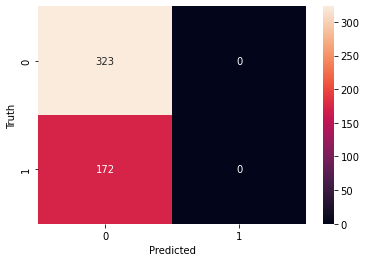

In [68]:
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Classification report

In [69]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.65      1.00      0.79       323
           2       0.00      0.00      0.00       172

    accuracy                           0.65       495
   macro avg       0.33      0.50      0.39       495
weighted avg       0.43      0.65      0.52       495



C:\Users\chetna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chetna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chetna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
Text = ['Was war dein größter Erfolg ',
        'die größte niederlage an sich gibt es nicht' ,
        'immer wieder tiefschläge, aufstehen, krönchen richten, weitermachen',
        'genauso wie höhenflüge ich kann mich da letztlich nur wiederholen',
        'und den satz von oben nochmal hierhin schreiben']

model.predict(Text)

1/1 [==============================] - 2s 2s/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)